In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/SocialNetworkAds (1).csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Text(0.5, 1.0, 'Box plot of EstimatedSalary')

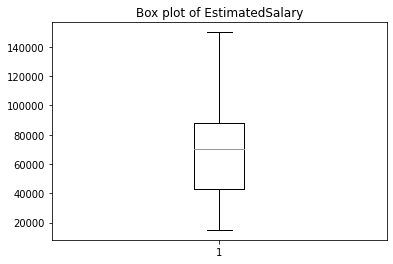

In [ ]:
plt.boxplot(data['EstimatedSalary'])
plt.title('Box plot of EstimatedSalary')

Text(0.5, 1.0, 'Box plot of purchased')

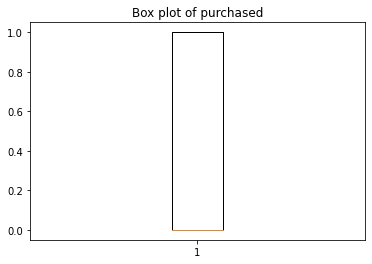

In [ ]:
plt.boxplot(data['Purchased'])
plt.title('Box plot of purchased')

In [ ]:
data=pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


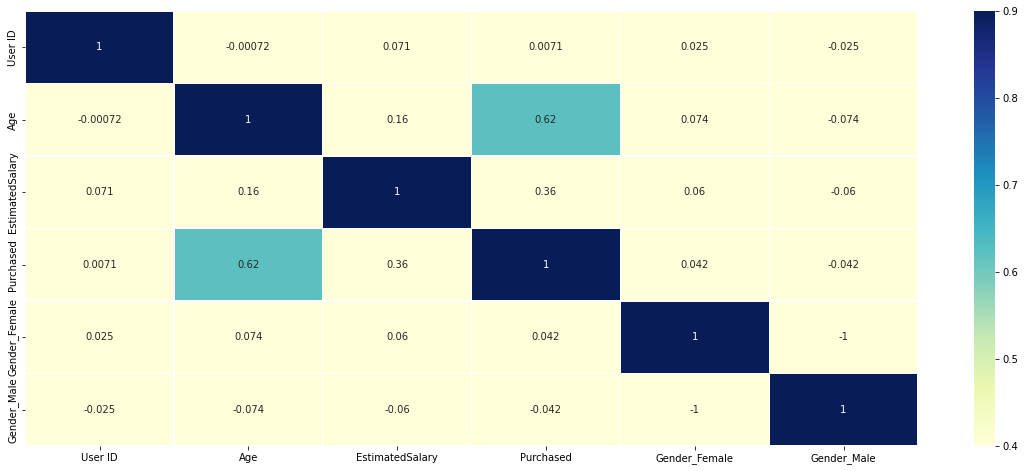

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y=data['Purchased']
X=data.drop('Purchased',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print(y_test)

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 0.2625
